In [1]:
# imports
import pandas as pd
import numpy as np
from datetime import datetime
from statistics import mode
import matplotlib.pyplot as plt
import pickle
from collections import Counter
from scipy import stats


In [2]:
import time
import warnings
warnings.filterwarnings("ignore")



In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
import time
import warnings
warnings.filterwarnings("ignore")
path = "/content/drive/MyDrive/Booking.com_Challenge"

In [5]:
# load data
df = pd.read_csv(path+"/train_set.csv")


In [6]:
df.head()


,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,1000027,2016-08-13,2016-08-14,8183,desktop,7168,Elbonia,Gondal,1000027_1
1,1000027,2016-08-14,2016-08-16,15626,desktop,7168,Elbonia,Gondal,1000027_1
2,1000027,2016-08-16,2016-08-18,60902,desktop,7168,Elbonia,Gondal,1000027_1
3,1000027,2016-08-18,2016-08-21,30628,desktop,253,Elbonia,Gondal,1000027_1
4,1000033,2016-04-09,2016-04-11,38677,mobile,359,Gondal,Cobra Island,1000033_1


In [7]:
# first columns is a loading mistake, second is irrelevant: we are evaluating trip's tendancies not user's
df.drop(["user_id", 'affiliate_id', 'device_class'], axis=1, inplace=True)


In [8]:
df.head()


,checkin,checkout,city_id,booker_country,hotel_country,utrip_id
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1


In [9]:
# Build dict city id to country:
city_to_country = {}
lst_cities = df.groupby("city_id").last().index
lst_associated_countries = df.groupby("city_id").last().hotel_country.values
for i in range(len(lst_cities)):
    city_to_country[lst_cities[i]] = lst_associated_countries[i]

with open(path+"city_to_country.pkl", "wb") as f:
    pickle.dump(city_to_country, f)


In [10]:
print(f"Number of reservations: {df.shape[0]}")


Number of reservations: 1166835


In [11]:
trips = df.groupby("utrip_id").city_id.apply(np.array)


In [12]:
lens = [len(trip) for trip in trips]


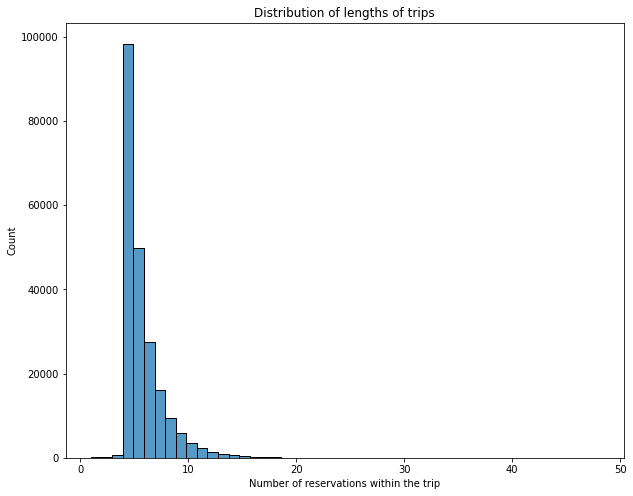

Most frequent size of a trip: 4
Median size of a trip: 5.0
Maximum size of a trip: 48
Number of trips with size 1: 113


In [13]:
import seaborn as sns
plt.figure(figsize=(10, 8))

sns.histplot(lens, bins=48)
plt.title("Distribution of lengths of trips")
plt.xlabel("Number of reservations within the trip")
plt.show()

print(f"Most frequent size of a trip: {stats.mode(lens)[0][0]}")
print(f"Median size of a trip: {np.median(lens)}")
print(f"Maximum size of a trip: {np.max(lens)}")
print(f"Number of trips with size 1: {(np.array(lens) == 1).sum()}")


Unique values 

In [14]:
print(f"Number of different cities: {df.city_id.nunique()}")
print(f"Number of different countries: {df.hotel_country.nunique()}")
print(f"Number of trips: {df.utrip_id.nunique()}")


Number of different cities: 39901
Number of different countries: 195
Number of trips: 217686


In [15]:
# let's count city_id
countries_df = pd.DataFrame(df.groupby("hotel_country").city_id.count())
countries_df["unique_city_id"] = df.groupby("hotel_country").city_id.nunique()
most_represented_countries = countries_df.sort_values("city_id").city_id[-20:]


In [16]:
print(
    f"Median number of reservation in each country: {countries_df.city_id.median()}")
print(f"{(countries_df.city_id < 10).sum()} countries have less than 10 reservations")


Median number of reservation in each country: 199.0
40 countries have less than 10 reservations


Countries with most reservations

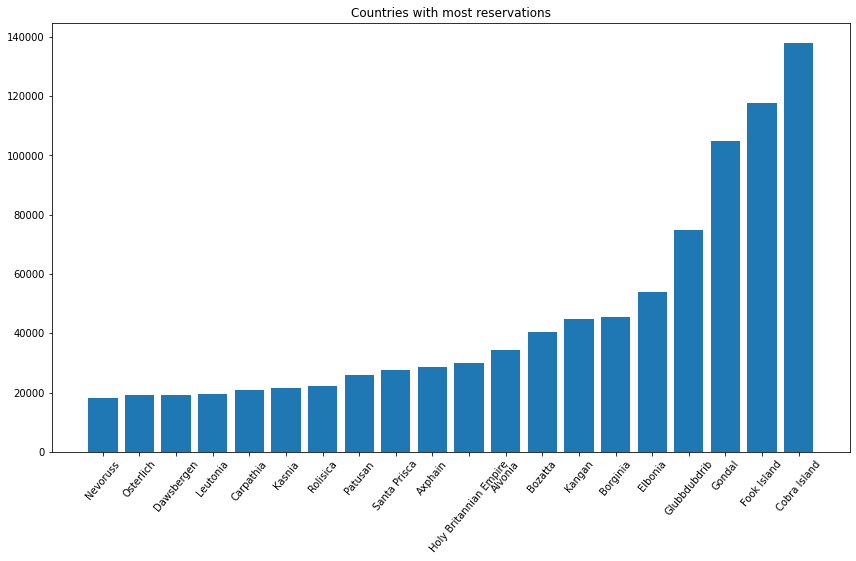

In [17]:
import seaborn as sns
plt.figure(figsize=(12, 14))

plt.subplot(2, 1, 1)
plt.bar(most_represented_countries.index, most_represented_countries)
plt.title("Countries with most reservations")
plt.xticks(rotation=50)

plt.tight_layout()

plt.show()


In [18]:
vc = df.city_id.value_counts()

def choose_threshold(n):
    print(
        f"By choosing this threshold of {n}, you keep {vc.loc[vc.values > n].shape[0]} cities, \nwhich account for {np.round(vc.loc[vc.values > n].sum() / df.shape[0], 2)} reservations of the total")
    return vc.loc[vc.values > n].index


In [19]:
cities_index = choose_threshold(6)


By choosing this threshold of 6, you keep 12345 cities, 
which account for 0.95 reservations of the total


Let's choose 6, in order to keep 95% of reservation but divides number of cities by more than 3


In [20]:
filtered_df = df.loc[df.city_id.isin(cities_index)]


In [21]:
filtered_df


,checkin,checkout,city_id,booker_country,hotel_country,utrip_id
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1
...,...,...,...,...,...,...
1166830,2016-05-01,2016-05-02,20345,Gondal,Fook Island,999855_1
1166831,2016-06-23,2016-06-24,17944,Gondal,Glubbdubdrib,999944_1
1166832,2016-06-24,2016-06-27,47075,Gondal,Glubbdubdrib,999944_1
1166833,2016-06-27,2016-06-29,228,Gondal,Glubbdubdrib,999944_1


In [22]:
print(f"Number of different cities: {filtered_df.city_id.nunique()}")
print(f"Number of different countries: {filtered_df.hotel_country.nunique()}")
print(f"Number of trips: {filtered_df.utrip_id.nunique()}")


Number of different cities: 12345
Number of different countries: 148
Number of trips: 217411


By doing so we suppressed about 50 countries, with small amounts of reservations. We eventually decide to keep them.


In [23]:
df.head()


,checkin,checkout,city_id,booker_country,hotel_country,utrip_id
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1


In [24]:
df

,checkin,checkout,city_id,booker_country,hotel_country,utrip_id
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1
...,...,...,...,...,...,...
1166830,2016-05-01,2016-05-02,20345,Gondal,Fook Island,999855_1
1166831,2016-06-23,2016-06-24,17944,Gondal,Glubbdubdrib,999944_1
1166832,2016-06-24,2016-06-27,47075,Gondal,Glubbdubdrib,999944_1
1166833,2016-06-27,2016-06-29,228,Gondal,Glubbdubdrib,999944_1


Encoding 

In [25]:
# fit our encoders on all data
from sklearn.preprocessing import LabelEncoder
encode_cities = LabelEncoder()
encode_hotel_country = LabelEncoder()
encode_booker_country = LabelEncoder()

encode_cities.fit(df.city_id)
encode_hotel_country.fit(df.hotel_country)
encode_booker_country.fit(df.booker_country)

# Save those encoders for preprocessing test data

with open(path+"Preprocessing_encoders.pkl", "wb") as f:
    pickle.dump([encode_cities, encode_hotel_country,
                encode_booker_country], f)


---


## Saving a test dataframe


In [26]:
df.head()


,checkin,checkout,city_id,booker_country,hotel_country,utrip_id
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1


In [27]:
import random
random.seed(42)
print(f"There is {df.utrip_id.nunique()} different trips")
n_samples = int(np.round(df.utrip_id.nunique() * 0.05))
print(f'We will use 5% in our test set: {n_samples}')


test_index = random.sample(list(df.utrip_id.unique()), n_samples)


There is 217686 different trips
We will use 5% in our test set: 10884


In [28]:
# Split between test and train data
test_set = df.loc[df.utrip_id.isin(test_index)]
train_set = df.loc[np.invert(df.utrip_id.isin(test_index))]


In [29]:
print(
    f"We kept {train_set.city_id.nunique()} different cities in our train set")


We kept 39265 different cities in our train set


In [30]:
# reset index
test_set.reset_index(drop=True, inplace=True)


In [31]:
# Let's hide targets of test set
test_set["is_new_trip"] = test_set[["utrip_id"]].shift() != test_set[[
    "utrip_id"]]

# Start of the trips - 1
end_of_trips = np.array(test_set.loc[test_set.is_new_trip].index) - 1
# We remove first element
end_of_trips = end_of_trips[1:]
# And add the last one
end_of_trips = np.append(end_of_trips, test_set.index[-1])

test_set["is_target"] = test_set.index.isin(end_of_trips)


In [32]:
# Save targets
y_test = test_set.loc[test_set.is_target][[
    "utrip_id", "hotel_country", "city_id"]]
y_test


,utrip_id,hotel_country,city_id
10,1000682_1,Patusan,1910
14,100119_4,Chernarus,7823
18,1001347_1,Bartovia,42255
22,1001433_1,Gondal,47470
26,1002170_2,Elbonia,50343
...,...,...,...
58236,998369_2,Gondal,15626
58240,999122_1,Sokovia,6582
58252,999607_1,"Merania, Kingdom of",31531
58256,99967_1,Glubbdubdrib,66648


In [33]:
# hide hotel country and city_id in test set df
test_set.loc[test_set.is_target, 'hotel_country'] = "?"
test_set.loc[test_set.is_target, 'city_id'] = "?"


In [34]:
test_set.head()


,checkin,checkout,city_id,booker_country,hotel_country,utrip_id,is_new_trip,is_target
0,2017-02-03,2017-02-04,60143,The Devilfire Empire,Patusan,1000682_1,True,False
1,2017-02-04,2017-02-05,65015,The Devilfire Empire,Patusan,1000682_1,False,False
2,2017-02-05,2017-02-07,46883,The Devilfire Empire,Patusan,1000682_1,False,False
3,2017-02-07,2017-02-08,7663,The Devilfire Empire,Patusan,1000682_1,False,False
4,2017-02-08,2017-02-09,40871,The Devilfire Empire,Patusan,1000682_1,False,False


In [35]:
# Save test set for later
with open(path+"test_data.pkl", "wb") as f:
    pickle.dump([test_set, y_test], f)


Refining the train and validation set


In [36]:
df = train_set


In [37]:
df


,checkin,checkout,city_id,booker_country,hotel_country,utrip_id
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1
...,...,...,...,...,...,...
1166830,2016-05-01,2016-05-02,20345,Gondal,Fook Island,999855_1
1166831,2016-06-23,2016-06-24,17944,Gondal,Glubbdubdrib,999944_1
1166832,2016-06-24,2016-06-27,47075,Gondal,Glubbdubdrib,999944_1
1166833,2016-06-27,2016-06-29,228,Gondal,Glubbdubdrib,999944_1


Let's apply some preprocessing


In [38]:
# Transform dates into datetime format
df.checkin = df.checkin.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df.checkout = df.checkout.apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))


In [39]:
# Min and max dates
df.checkin.min(), df.checkout.max()


(Timestamp('2015-12-31 00:00:00'), Timestamp('2017-02-28 00:00:00'))

In [40]:
df


,checkin,checkout,city_id,booker_country,hotel_country,utrip_id
0,2016-08-13,2016-08-14,8183,Elbonia,Gondal,1000027_1
1,2016-08-14,2016-08-16,15626,Elbonia,Gondal,1000027_1
2,2016-08-16,2016-08-18,60902,Elbonia,Gondal,1000027_1
3,2016-08-18,2016-08-21,30628,Elbonia,Gondal,1000027_1
4,2016-04-09,2016-04-11,38677,Gondal,Cobra Island,1000033_1
...,...,...,...,...,...,...
1166830,2016-05-01,2016-05-02,20345,Gondal,Fook Island,999855_1
1166831,2016-06-23,2016-06-24,17944,Gondal,Glubbdubdrib,999944_1
1166832,2016-06-24,2016-06-27,47075,Gondal,Glubbdubdrib,999944_1
1166833,2016-06-27,2016-06-29,228,Gondal,Glubbdubdrib,999944_1


Everything takes place between those dates, we will add season shift dates


In [41]:
# define seasons key dates
winter_start = datetime.strptime("2015-12-21", "%Y-%m-%d")
spring_start = datetime.strptime("2016-03-20", "%Y-%m-%d")
summer_start = datetime.strptime("2016-06-20", "%Y-%m-%d")
autumn_start = datetime.strptime("2016-09-22", "%Y-%m-%d")
winter_start2 = datetime.strptime("2016-12-21", "%Y-%m-%d")


In [42]:
def get_season(date):
    if date < spring_start:
        # 0 for winter
        return 0
    if date < summer_start:
        # 1 for spring
        return 1
    if date < autumn_start:
        # 2 for summer
        return 2
    if date < winter_start2:
        # 3 for autumn
        return 3
    # else: it is the start of 2017, hence winter
    return 0


In [43]:
# get current season when checking in or checking out
df["checkin_season"] = df.checkin.apply(get_season)
df["checkout_season"] = df.checkout.apply(get_season)


In [44]:
# df["month_reservation"] = df.checkin.apply(lambda x: x.month)


Let's inspect consecutive cities


In [45]:
# Let's deal with trip with consecutive cities
df["is_new_trip"] = df[["utrip_id"]].shift() != df[["utrip_id"]]
df["is_new_city"] = df[["city_id"]].shift() != df[["city_id"]]


In [46]:
# When it is both not a new trip, and not a new city, it means it is a consecutive city reservation within a trip
df["is_consecutive_res"] = (
    df.is_new_city == False) & (df.is_new_trip == False)


In [47]:
print(
    f"{np.round(df.is_consecutive_res.sum() / df.shape[0], 2)} of reservations are made in the same city as before")


0.07 of reservations are made in the same city as before


In [48]:
consec = df.loc[df.is_consecutive_res].city_id.value_counts().to_dict()
total_count = df.city_id.value_counts().to_dict()


In [49]:
for city in consec.keys():
    consec[city] = consec[city] / total_count[city]


We decide to remove them


In [50]:
# remove consecutive reservations
filtered_df = df.loc[np.invert(df.is_consecutive_res)]


Dropping columns that are not required

In [51]:
col_to_drop = ["checkin", "checkout", "checkout_season", "is_consecutive_res",
               "is_new_city", "is_new_trip"]

filtered_df.drop(col_to_drop, axis=1, inplace=True)


Now, we need to encode most of our data


In [52]:
filtered_df.city_id = encode_cities.transform(filtered_df.city_id)
filtered_df.hotel_country = encode_hotel_country.transform(
    filtered_df.hotel_country)
filtered_df.booker_country = encode_booker_country.transform(
    filtered_df.booker_country)


In [53]:
filtered_df.head()


,city_id,booker_country,hotel_country,utrip_id,checkin_season
0,4877,1,60,1000027_1,2
1,9210,1,60,1000027_1,2
2,36011,1,60,1000027_1,2
3,18088,1,60,1000027_1,2
4,22871,2,36,1000033_1,1


In [54]:
# Save the preprocessed df
with open(path+"preprocessed_df.pkl", "wb") as f:
    pickle.dump(filtered_df, f)


In [55]:
# Now reset index with utrip id
df = filtered_df

df.set_index("utrip_id", inplace=True)


In [56]:
import random
random.seed(10)
print(f"There is {df.index.nunique()} different trips")
n_samples = int(np.round(df.index.nunique() * 0.1))
print(f'We will use 10% in our validation set: {n_samples}')


val_index = random.sample(list(df.index.unique()), n_samples)


There is 206802 different trips
We will use 10% in our validation set: 20680


In [57]:
# save it
with open(path+"val_index_split.pkl", 'wb') as f:
    pickle.dump(val_index, f)


In [58]:
val_set = df.loc[df.index.isin(val_index)]
train_set = df.loc[np.invert(df.index.isin(val_index))]

# for simplification
df = train_set


In [59]:
# Normalize all columns except city_id
normalized_values = {}


'''
  We normalize our training set
    Min-Max Normalization
'''
for col in df.columns[1:]:
    normalized_values[col] = (df[col].min(), df[col].max())
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

'''
  We normalize our val set
    Min-Max Normalization
'''
for col in val_set.columns[1:]:
    min_value, max_value = normalized_values[col]
    val_set[col] = (val_set[col] - min_value) / (max_value - min_value)


In [60]:
normalized_values


{'booker_country': (0, 4), 'hotel_country': (0, 194), 'checkin_season': (0, 3)}

In [61]:
with open(path+"normalized_values.pkl", "wb") as f:
    pickle.dump(normalized_values, f)


In [62]:
# Retrieve trips info
trips = df.groupby("utrip_id").apply(np.array)


In [63]:
lens = [len(trip) for trip in trips]


In [64]:
np.min(lens), np.max(lens)


(1, 40)

In [65]:
print(f"We have currently {len(lens)} trips in our train set")
print(
    f"We will keep all those greater than size 3: {(np.array(lens) > 4).sum()} trips")


We have currently 186122 trips in our train set
We will keep all those greater than size 3: 87925 trips


In [66]:
df


,city_id,booker_country,hotel_country,checkin_season
utrip_id,,,,
1000027_1,4877,0.25,0.309278,0.666667
1000027_1,9210,0.25,0.309278,0.666667
1000027_1,36011,0.25,0.309278,0.666667
1000027_1,18088,0.25,0.309278,0.666667
1000033_1,22871,0.50,0.185567,0.333333
...,...,...,...,...
999855_1,12000,0.50,0.268041,0.333333
999944_1,10598,0.50,0.304124,0.666667
999944_1,27892,0.50,0.304124,0.666667


In [67]:

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
cities_sequences = []
# trips_info = []
y = []
for trip in trips:
    # discard trip smaller than 4
    # print('==>', trip, len(trip))
    if len(trip) < 4:
        continue
    # We start at 4
    for i in range(3, len(trip)):
        for elements in TimeseriesGenerator(trip, trip, i):
            # elements contain the list of i sequences and list of i targets in a tuple
            tpls = elements[0]
            targets = elements[1]
            # print('111111=>', tpls)
            # print('222222=>', targets)
            n = len(tpls)
            for j in range(n):
               
                cities_sequence = tpls[j][:, 0]
               

                # trip_information = [last_booker, last_num_days, month_res]

                # target city
                target = targets[j][0]

                # Save all
                cities_sequences.append(cities_sequence)
                # trips_info.append(trip_information)
                y.append(target)


In [68]:
print(
    f'We now have a new train set of {len(y)} trips with at least 4 destinations')


We now have a new train set of 947131 trips with at least 4 destinations


In [69]:
# Retrieve trips info
val_trips = val_set.groupby("utrip_id").apply(np.array)
val_trips


utrip_id
1000083_1    [[33122.0, 1.0, 0.6288659793814433, 0.33333333...
1000237_1    [[15243.0, 0.5, 0.30412371134020616, 0.6666666...
1000706_1    [[36981.0, 0.25, 0.26804123711340205, 0.0], [2...
1002130_1    [[28721.0, 0.5, 0.18556701030927836, 1.0], [31...
10029_2      [[29420.0, 0.5, 0.31958762886597936, 1.0], [21...
                                   ...                        
999288_1     [[27649.0, 0.5, 0.4381443298969072, 1.0], [178...
999377_1     [[17020.0, 0.5, 0.26804123711340205, 0.6666666...
999385_2     [[17350.0, 1.0, 0.18556701030927836, 0.6666666...
999674_3     [[6761.0, 0.5, 0.26804123711340205, 0.66666666...
999708_1     [[38342.0, 0.5, 0.26804123711340205, 0.6666666...
Length: 20680, dtype: object

In [70]:
val_trips[0].shape


(4, 4)

In [71]:
cities_sequences_val = []

y_val = []

for trip in val_trips:
    # #We do not consider the last destination of the trip
    
    # discard trip smaller than 4
    if len(trip) < 4:
        continue
    # We start at 4
    for i in range(3, len(trip)):
        for elements in TimeseriesGenerator(trip, trip, i):
            # elements contain the list of i sequences and list of i targets in a tuple
            tpls = elements[0]
            targets = elements[1]
            n = len(tpls)
            for j in range(n):
                # cities within trip
                cities_sequence = tpls[j][:, 0]
                
                # target city
                target = targets[j][0]

                # Save all
                cities_sequences_val.append(cities_sequence)
                # trips_info.append(trip_information)
                y_val.append(target)


Displaying the max length of train and val sequence

In [72]:
lens_trips = [len(trip) for trip in cities_sequences]
print(f"Max len of trip in train seq: {np.max(lens_trips)}")

lens_trips_val = [len(trip) for trip in cities_sequences_val]
print(f"Max len of trip in val seq: {np.max(lens_trips_val)}")


Max len of trip in train seq: 39
Max len of trip in val seq: 26


In [73]:
print(
    f'We now have a new train set of {len(y)} trips with at least 4 destinations')


We now have a new train set of 947131 trips with at least 4 destinations


Splitting the data into train and test

In [74]:
# Finalization
X_train_cities = cities_sequences
# X_train_info = trips_info
y_train = np.array(y)


X_val_cities = cities_sequences_val
# X_val_info = trips_info_val
y_val = np.array(y_val)


Displaying length of trin and test data

In [75]:
len(y_train), len(y_val)


(947131, 105400)

In [76]:
# Save data to compressed files
# train data
from numpy import savez_compressed, load
savez_compressed(path+"X_train_cities.npz", X_train_cities)
# savez_compressed("X_train_info.npz", X_train_info)
savez_compressed(path+"y_train.npz", y_train)

# val data
savez_compressed(path+"X_val_cities.npz", X_val_cities)
# savez_compressed("X_val_info.npz", X_val_info)
savez_compressed(path+"y_val.npz", y_val)


In [77]:
with open(path+"test_data.pkl", "rb") as f:
    test_set, y_test = pickle.load(f)


In [78]:
with open(path+"Preprocessing_encoders.pkl", "rb") as f:
    encode_cities, encode_hotel_country, encode_booker_country = pickle.load(f)

with open(path+"normalized_values.pkl", "rb") as f:
    normalized_values = pickle.load(f)


In [79]:
y_test = y_test.set_index("utrip_id").sort_index()


we converted the checkin and checkout features into datetime format. We find the consecutive trips , the city_ids were encoded and the model was trained with city_id , utrip_id as the features.  We set the utrip_id as an index as we future group the cities based on it creating cities_sequences. The transformed sequences of city_ids which are encoded are given as an input into the model for training.

In [80]:
def apply_preprocessing(test_set, datetime_format="%Y-%m-%d", target="?", skip_duplicates=True):

    df = test_set.copy()

    # Transform dates into datetime format
    df.checkin = df.checkin.apply(
        lambda x: datetime.strptime(x, datetime_format))
    df.checkout = df.checkout.apply(
        lambda x: datetime.strptime(x, datetime_format))

   

    # get current season when checking in or checking out
    df["checkin_season"] = df.checkin.apply(get_season)
    df["checkout_season"] = df.checkout.apply(get_season)

   

    # Let's deal with trip with consecutive cities
    df["is_new_trip"] = df[["utrip_id"]].shift() != df[["utrip_id"]]
    df["is_new_city"] = df[["city_id"]].shift() != df[["city_id"]]
    # When it is both not a new trip, and not a new city, it means it is a consecutive city reservation within a trip
    df["is_consecutive_res"] = (
        df.is_new_city == False) & (df.is_new_trip == False)

    # remove consecutive reservations
    if skip_duplicates:
        df = df.loc[np.invert(df.is_consecutive_res)]

    col_to_drop = ["checkin", "checkout", "checkout_season", "is_consecutive_res",
                   "is_new_city", "is_new_trip", "is_target"]

    df.drop(col_to_drop, axis=1, inplace=True)

    # Retrieve trips info
    df.set_index("utrip_id", inplace=True)

    # encode city_id and hotel country
    mask = df['city_id'] != target
    df.loc[mask, 'city_id'] = encode_cities.transform(df.loc[mask, 'city_id'])
    df.loc[mask, 'hotel_country'] = encode_hotel_country.transform(
        df.loc[mask, "hotel_country"])

    # encode the rest of data
    
    df.booker_country = encode_booker_country.transform(df.booker_country)

    # Scale
    for col in df.columns[1:]:
        # not hotel country
        if col == "hotel_country":
            continue
        min_value, max_value = normalized_values[col]
        df[col] = (df[col] - min_value) / (max_value - min_value)

    # Normalize hotel country col
    min_value, max_value = normalized_values["hotel_country"]
    df.loc[mask, "hotel_country"] = (
        df.loc[mask, "hotel_country"] - min_value) / (max_value - min_value)

    # Retrieve trips info
    trips = df.groupby("utrip_id").apply(np.array)
    index = trips.groupby("utrip_id").apply(np.array).index

    cities_sequences = []
    # trip_info = []
    lst_indexes = []
    not_trip_ids = []
    for i, trip in enumerate(trips):
        if len(trip) == 1:
            # print(trip)
            # print(index[i])
            not_trip_ids.append(index[i])
            # y_test = y_test.loc[y_test.utrip_id != index[i]]
            print("Not a trip")
            continue
        # save index
        lst_indexes.append((index[i]))
        cities_sequence = trip[:-1, 0]
        
       

        # Save all
        cities_sequences.append(cities_sequence)
        # trip_info.append(trip_information)
    y_test.drop(not_trip_ids, inplace=True)
    return cities_sequences, lst_indexes,  # trip_info,


In [81]:
X_test_cities, index = apply_preprocessing(test_set)


Not a trip
Not a trip
Not a trip
Not a trip
Not a trip


In [82]:
y_test.city_id = encode_cities.transform(y_test.city_id)

In [83]:
savez_compressed(path+"X_test_cities.npz", X_test_cities)
savez_compressed(path+"X_test_index.npz", index)
savez_compressed(path+"y_test.npz", y)

Building the LSTM model

In [84]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Input, BatchNormalization
from tensorflow.keras.regularizers import L2
import tensorflow as tf

def create_model(l2=0.0001, embedding_size=100, num_cities=39901, dropout=0.5, recurrent_layer=LSTM, rnn_units=100):
    trips_sequences_input = Input(shape=(None,))
    reg = L2(l2=l2)

    # First cities with Embeddings
    emb_layer = Embedding(output_dim=embedding_size, input_dim=num_cities, input_length=None,
                          mask_zero=False, name="city_embeddings")

    emb_cities = emb_layer(trips_sequences_input)
    lstm_cities_1 = recurrent_layer(rnn_units, dropout=dropout, return_sequences=True,
                                    kernel_regularizer=reg)(emb_cities)

    lstm_cities_2 = recurrent_layer(rnn_units, dropout=dropout, return_sequences=False,
                                    kernel_regularizer=reg)(lstm_cities_1)

    norm = BatchNormalization()(lstm_cities_2)
    output = Dense(num_cities, activation='softmax')(norm)
    model = Model(inputs=[trips_sequences_input], outputs=[output])

    return model


In [85]:
model = create_model(recurrent_layer=LSTM, rnn_units=100, embedding_size=300)


Displaying the model summary

In [86]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 city_embeddings (Embedding)  (None, None, 300)        11970300  
                                                                 
 lstm (LSTM)                 (None, None, 100)         160400    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 39901)             4030001   
                                                             

In [87]:
def compile_model(model, learning_rate=0.00003):
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=learning_rate, clipvalue=.25)
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=['sparse_top_k_categorical_accuracy'])


In [88]:
compile_model(model)

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [90]:
filepath = path+"improvement-{epoch:02d}-{val_sparse_top_k_categorical_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_sparse_top_k_categorical_accuracy', verbose=1, save_best_only=True, mode='max')
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
callbacks_list = [checkpoint, early_stop]

In [91]:
from numpy import savez_compressed, load
import random


def getData(filename1, filename3, batch_size=512):
    # initiate a batch count for each size of trips
    batch_count = {k: 0 for k in range(50)}
    inputs = {k: [] for k in range(50)}
    targets = {k: [] for k in range(50)}
    while True:
        # load files
        trip_sequences = load(filename1, allow_pickle=True)["arr_0"]
        predictions = load(filename3, allow_pickle=True)["arr_0"]

        predictions = np.array(predictions, dtype="int32")

        for i in range(len(trip_sequences)):

            # consider trip i
            trip_sequence = trip_sequences[i]
            prediction = predictions[i]
            len_trip = len(trip_sequence)

            # add info to corresponding  size
            inputs[len_trip].append([trip_sequence])
            targets[len_trip].append(prediction)
            batch_count[len_trip] += 1

            if batch_count[len_trip] == batch_size:
                X_trip = np.array([t[0]
                                  for t in inputs[len_trip]], dtype='float32')
                y = np.array(targets[len_trip]).reshape(batch_size,)
                # yield the data to feed the
                yield X_trip, y
                inputs[len_trip] = []
                targets[len_trip] = []
                batch_count[len_trip] = 0


In [99]:
batch_size = 256
train_generator = getData(path+"X_train_cities.npz", path+"y_train.npz", batch_size=batch_size)
val_generator = getData(path+"X_val_cities.npz", path+"y_val.npz", batch_size=batch_size)


Training the model and saving the history

In [104]:
import os
num_train_samples = len(X_train_cities)
num_val_samples = len(X_val_cities)
n_epochs = 60
training_performance = []


def train_model():
  print(f"\nBeginning model training\n---------------\n")
  history = model.fit(train_generator,
                      steps_per_epoch=num_train_samples // batch_size,
                      epochs=n_epochs,
                      validation_data=val_generator,
                      validation_steps=num_val_samples // batch_size,
                      batch_size=batch_size,
                      callbacks=callbacks_list)

  training_performance.append(history)
  model.save(path+"my_model_LSTM")
  return history 

# if os.path.isdir(path+"my_model_LSTM"):
#   print('loaded model!')
#   model = tf.keras.models.load_model(path+"my_model_LSTM")
# else:
#   history = train_model()

history = train_model()


Beginning model training
---------------

Epoch 1/60
3698/3699 [============================>.] - ETA: 0s - loss: 3.9953 - sparse_top_k_categorical_accuracy: 0.4917
Epoch 1: val_sparse_top_k_categorical_accuracy improved from 0.42880 to 0.43012, saving model to /content/drive/MyDrive/Booking.com_Challengeimprovement-01-0.43.hdf5
3699/3699 [==============================] - 80s 21ms/step - loss: 3.9952 - sparse_top_k_categorical_accuracy: 0.4917 - val_loss: 4.8293 - val_sparse_top_k_categorical_accuracy: 0.4301
Epoch 2/60
3698/3699 [============================>.] - ETA: 0s - loss: 3.8976 - sparse_top_k_categorical_accuracy: 0.5004
Epoch 2: val_sparse_top_k_categorical_accuracy improved from 0.43012 to 0.43164, saving model to /content/drive/MyDrive/Booking.com_Challengeimprovement-02-0.43.hdf5
3699/3699 [==============================] - 77s 21ms/step - loss: 3.8978 - sparse_top_k_categorical_accuracy: 0.5003 - val_loss: 4.8211 - val_sparse_top_k_categorical_accuracy: 0.4316
Epoch 3/6

In [94]:
test_generator = getData(path+"X_test_cities.npz", path+"y_test.npz", batch_size=batch_size)

1. ecoded_cities contains mapping of true value to encoded values.
the prediction function returns the encoded value
2. passing the encoded city to encoded_cities returns the true city value for the provided encoded city
3. city_to_country contains mapping of city to their country.


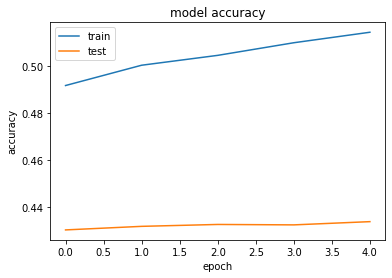

In [106]:
# summarize history for accuracy
plt.plot(history.history['sparse_top_k_categorical_accuracy'])
plt.plot(history.history['val_sparse_top_k_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



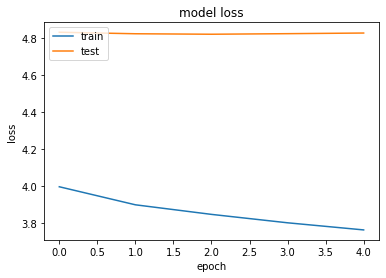

In [105]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [107]:
# LSTM Recommedation_1
ans = model.predict([[37849.0,37741.0, 37682.0]])
cities_temp = encode_cities.classes_
l = cities_temp[np.argmax(ans[0])]

print ('input', 64020, 63825, 63724)
print('output', cities_temp[int(i)], 'country', city_to_country[l],)


1/1 [==============================] - 1s 638ms/step
input 64020 63825 63724
output 6 country Gondal


In [108]:
# LSTM Recommendation_2
ans = model.predict([[5052.0, 37745.0, 24234.0]])
cities_temp = encode_cities.classes_
l = cities_temp[np.argmax(ans[0])]

print ('input', 5052, 37745, 24234)
print('output', cities_temp[int(i)], 'country', city_to_country[l],)


1/1 [==============================] - 0s 25ms/step
input 5052 37745 24234
output 6 country Santa Prisca


In [97]:
# input_cities = [5052., 37745., 24234.]
# # print(cities_temp.isin(input_cities))
# ans = model.predict([input_cities])
# cities_temp = encode_cities.classes_
# l = cities_temp[np.argmax(ans[0])]


# input_cities_unencoded = []
# for i in input_cities:
#   input_cities_unencoded.append(cities_temp[int(i)])

# print ('input', input_cities_unencoded)
# print('output', cities_temp[int(l)], 'country', city_to_country[l],)


Experimenting the model for 100 epochs 

In [109]:
import os
num_train_samples = len(X_train_cities)
num_val_samples = len(X_val_cities)
n_epochs = 100
training_performance = []


def train_model():
  print(f"\nBeginning model training\n---------------\n")
  history = model.fit(train_generator,
                      steps_per_epoch=num_train_samples // batch_size,
                      epochs=n_epochs,
                      validation_data=val_generator,
                      validation_steps=num_val_samples // batch_size,
                      batch_size=batch_size,
                      callbacks=callbacks_list)

  training_performance.append(history)
  model.save(path+"my_model_LSTM")
  return history 
history = train_model()


Beginning model training
---------------

Epoch 1/100
3699/3699 [==============================] - ETA: 0s - loss: 3.7255 - sparse_top_k_categorical_accuracy: 0.5193
Epoch 1: val_sparse_top_k_categorical_accuracy improved from 0.43364 to 0.43431, saving model to /content/drive/MyDrive/Booking.com_Challengeimprovement-01-0.43.hdf5
3699/3699 [==============================] - 79s 21ms/step - loss: 3.7255 - sparse_top_k_categorical_accuracy: 0.5193 - val_loss: 4.8292 - val_sparse_top_k_categorical_accuracy: 0.4343
Epoch 2/100
3699/3699 [==============================] - ETA: 0s - loss: 3.6946 - sparse_top_k_categorical_accuracy: 0.5230
Epoch 2: val_sparse_top_k_categorical_accuracy improved from 0.43431 to 0.43505, saving model to /content/drive/MyDrive/Booking.com_Challengeimprovement-02-0.44.hdf5
3699/3699 [==============================] - 80s 22ms/step - loss: 3.6946 - sparse_top_k_categorical_accuracy: 0.5230 - val_loss: 4.8370 - val_sparse_top_k_categorical_accuracy: 0.4350
Epoch 3

Since the model saves the best results at difefrent epochs it displays the best reuslts.



In [110]:
test_generator = getData(path+"X_test_cities.npz", path+"y_test.npz", batch_size=batch_size)

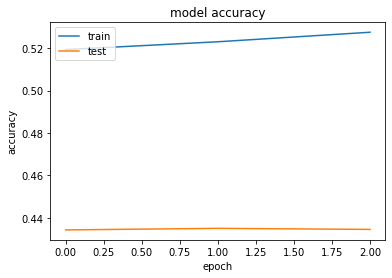

In [111]:
# summarize history for accuracy
plt.plot(history.history['sparse_top_k_categorical_accuracy'])
plt.plot(history.history['val_sparse_top_k_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

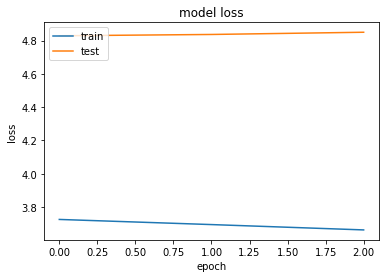

In [112]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1. The best results achieved are after experimenting with 50,60 and 100 epochs are:
loss: 3.6625 - sparse_top_k_categorical_accuracy: 0.5275 - val_loss: 4.8504 - val_sparse_top_k_categorical_accuracy: 0.4345
2. We have to train the model for higher number of epochs and tune the parameters to decrease the loss. This would require high resource usage to computation which can be part of our future work. 

References:
1. https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
2. https://github.com/harshithar416/Multi-destination-Trip-booking-Booking.com_challenge
3. https://github.com/MauroDNapoli/booking-challenge
4. https://github.com/DorBernsohn/Booking-Challenge
5. https://github.com/clementmg/Booking.com-Challenge/blob/main/7%20-%20Predicts%20submissions.ipynb
7. https://github.com/bookingcom/ml-dataset-mdt/blob/main/evaluation_demo.ipynb
8.  https://github.com/NVIDIA-Merlin/competitions/tree/main/WSDM_WebTour2021_Challenge
9. https://github.com/eliorc/bookingchallenge2020
 
